In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import json
from mplsoccer.pitch import Pitch
%matplotlib inline  
pd.options.mode.chained_assignment = None
plt.style.use('ggplot')
#importing all the needed libraries
from adjustText import adjust_text
from matplotlib.transforms import Affine2D
import mpl_toolkits.axisartist.floating_axes as floating_axes
import matplotlib.patches as patches
# from pywaffle import Waffle
# from highlight_text.htext import htext, fig_htext

In [17]:
with open('open-data-master/data/matches/43/3.json') as m:
    m = json.load(m)
#Get thelist of matches played in 2018 World Cup

In [18]:
m_id=[]
for i in range(0,len(m)):
    m_id.append(m[i]["match_id"])

In [19]:
len(m_id)

64

In [20]:
#converting them to string so they are helpful when needed 
for i in range(0,len(m_id)):
    m_id[i]=str(m_id[i])

In [21]:
df=pd.DataFrame()
for i in m_id:
    match=json.load(open("open-data-master/data/events/"+i+".json",encoding="utf8"))
    temp_df=pd.json_normalize(match).assign(match_id = int(i)) 
    df=pd.concat([df,temp_df],axis=0,)

In [22]:
df.shape

(227886, 122)

In [23]:
df.columns[:40]

Index(['id', 'index', 'period', 'timestamp', 'minute', 'second', 'possession',
       'duration', 'type.id', 'type.name', 'possession_team.id',
       'possession_team.name', 'play_pattern.id', 'play_pattern.name',
       'team.id', 'team.name', 'tactics.formation', 'tactics.lineup',
       'related_events', 'location', 'player.id', 'player.name', 'position.id',
       'position.name', 'pass.recipient.id', 'pass.recipient.name',
       'pass.length', 'pass.angle', 'pass.height.id', 'pass.height.name',
       'pass.end_location', 'pass.body_part.id', 'pass.body_part.name',
       'pass.type.id', 'pass.type.name', 'under_pressure',
       'carry.end_location', 'pass.outcome.id', 'pass.outcome.name',
       'pass.aerial_won'],
      dtype='object')

In [24]:
df["total_time"]=(df["minute"]*60)+df["second"]

/tmp/ipykernel_6026/1102010149.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["total_time"]=(df["minute"]*60)+df["second"]


In [25]:
sh_df=df[df["type.name"]=="Shot"][["type.name","location","minute","second","index","possession_team.name","match_id","timestamp","total_time"]]

In [26]:
sh_df=sh_df.reset_index(drop=True)

In [27]:
sh_df.head()

,type.name,location,minute,second,index,possession_team.name,match_id,timestamp,total_time
0,Shot,"[115.0, 34.0]",0,57,38,Denmark,7581,00:00:57.320,57
1,Shot,"[112.0, 36.0]",3,39,122,Croatia,7581,00:03:39.880,219
2,Shot,"[101.0, 55.0]",11,34,331,Croatia,7581,00:11:34.400,694
3,Shot,"[103.0, 24.0]",18,55,718,Croatia,7581,00:18:55.480,1135
4,Shot,"[96.0, 37.0]",22,6,801,Denmark,7581,00:22:06.080,1326


In [28]:
sh_df[sh_df["type.name"]==("Shot")]

,type.name,location,minute,second,index,possession_team.name,match_id,timestamp,total_time
0,Shot,"[115.0, 34.0]",0,57,38,Denmark,7581,00:00:57.320,57
1,Shot,"[112.0, 36.0]",3,39,122,Croatia,7581,00:03:39.880,219
2,Shot,"[101.0, 55.0]",11,34,331,Croatia,7581,00:11:34.400,694
3,Shot,"[103.0, 24.0]",18,55,718,Croatia,7581,00:18:55.480,1135
4,Shot,"[96.0, 37.0]",22,6,801,Denmark,7581,00:22:06.080,1326
...,...,...,...,...,...,...,...,...,...
1701,Shot,"[110.0, 45.0]",82,30,3070,Sweden,7551,00:37:30.480,4950
1702,Shot,"[111.0, 40.0]",87,15,3232,Germany,7551,00:42:15.400,5235
1703,Shot,"[101.0, 46.0]",91,22,3364,Germany,7551,00:46:22.360,5482
1704,Shot,"[107.0, 59.0]",93,42,3419,Sweden,7551,00:48:42.440,5622


In [29]:
p_df=pd.DataFrame()
for i in range(0,sh_df.shape[0]):
    time=sh_df["total_time"][i]
    ma_id=sh_df["match_id"][i]
    temp_df=df[(df["match_id"]==ma_id) & (df["type.name"]=="Pass") & (df["total_time"]<=time) & (df["total_time"]>=time-15)]
    p_df=pd.concat([p_df,temp_df],axis=0,)
    
        
        
        

KeyboardInterrupt: 

In [ ]:
p_df["player.name"].value_counts().head(9)

In [ ]:
cor=p_df[p_df['pass.type.name']=='Corner'].index

In [ ]:
p_df=p_df.drop(cor)

In [ ]:
pdf=p_df.copy()

In [ ]:
def nc(x):
    if x=="Neymar da Silva Santos Junior":
        return "Neymar Jr"
    elif x=="Francisco Román Alarcón Suárez":
        return "Isco"
    elif x=="Philippe Coutinho Correia":
        return "Philippe Coutinho"
    else:
        return x


pdf["player.name"]=pdf["player.name"].apply(lambda x:nc(x))


In [308]:
names=pdf["player.name"].value_counts().head(9).index.to_list()


In [309]:
names

['Luka Modrić',
 'Neymar Jr',
 'Toni Kroos',
 'Philippe Coutinho',
 'Kevin De Bruyne',
 'Isco',
 'Kieran Trippier',
 'Joshua Kimmich',
 'Ivan Rakitić']

In [310]:
names=np.array(names)

In [311]:
names=names.reshape(3,3)

In [312]:
passes=p_df["player.name"].value_counts().head(9).to_list()

In [313]:
passes

[58, 50, 46, 46, 45, 43, 39, 39, 38]

In [33]:
passes=np.array(passes)

In [34]:
passes=passes.reshape(3,3)

In [30]:
names = ['Luka Modrić',
 'Neymar Jr',
 'Toni Kroos',
 'Philippe Coutinho',
 'Kevin De Bruyne',
 'Isco',
 'Kieran Trippier',
 'Joshua Kimmich',
 'Ivan Rakitić']

In [31]:
passes = [58, 50, 46, 46, 45, 43, 39, 39, 38]

NameError: name 'p' is not defined

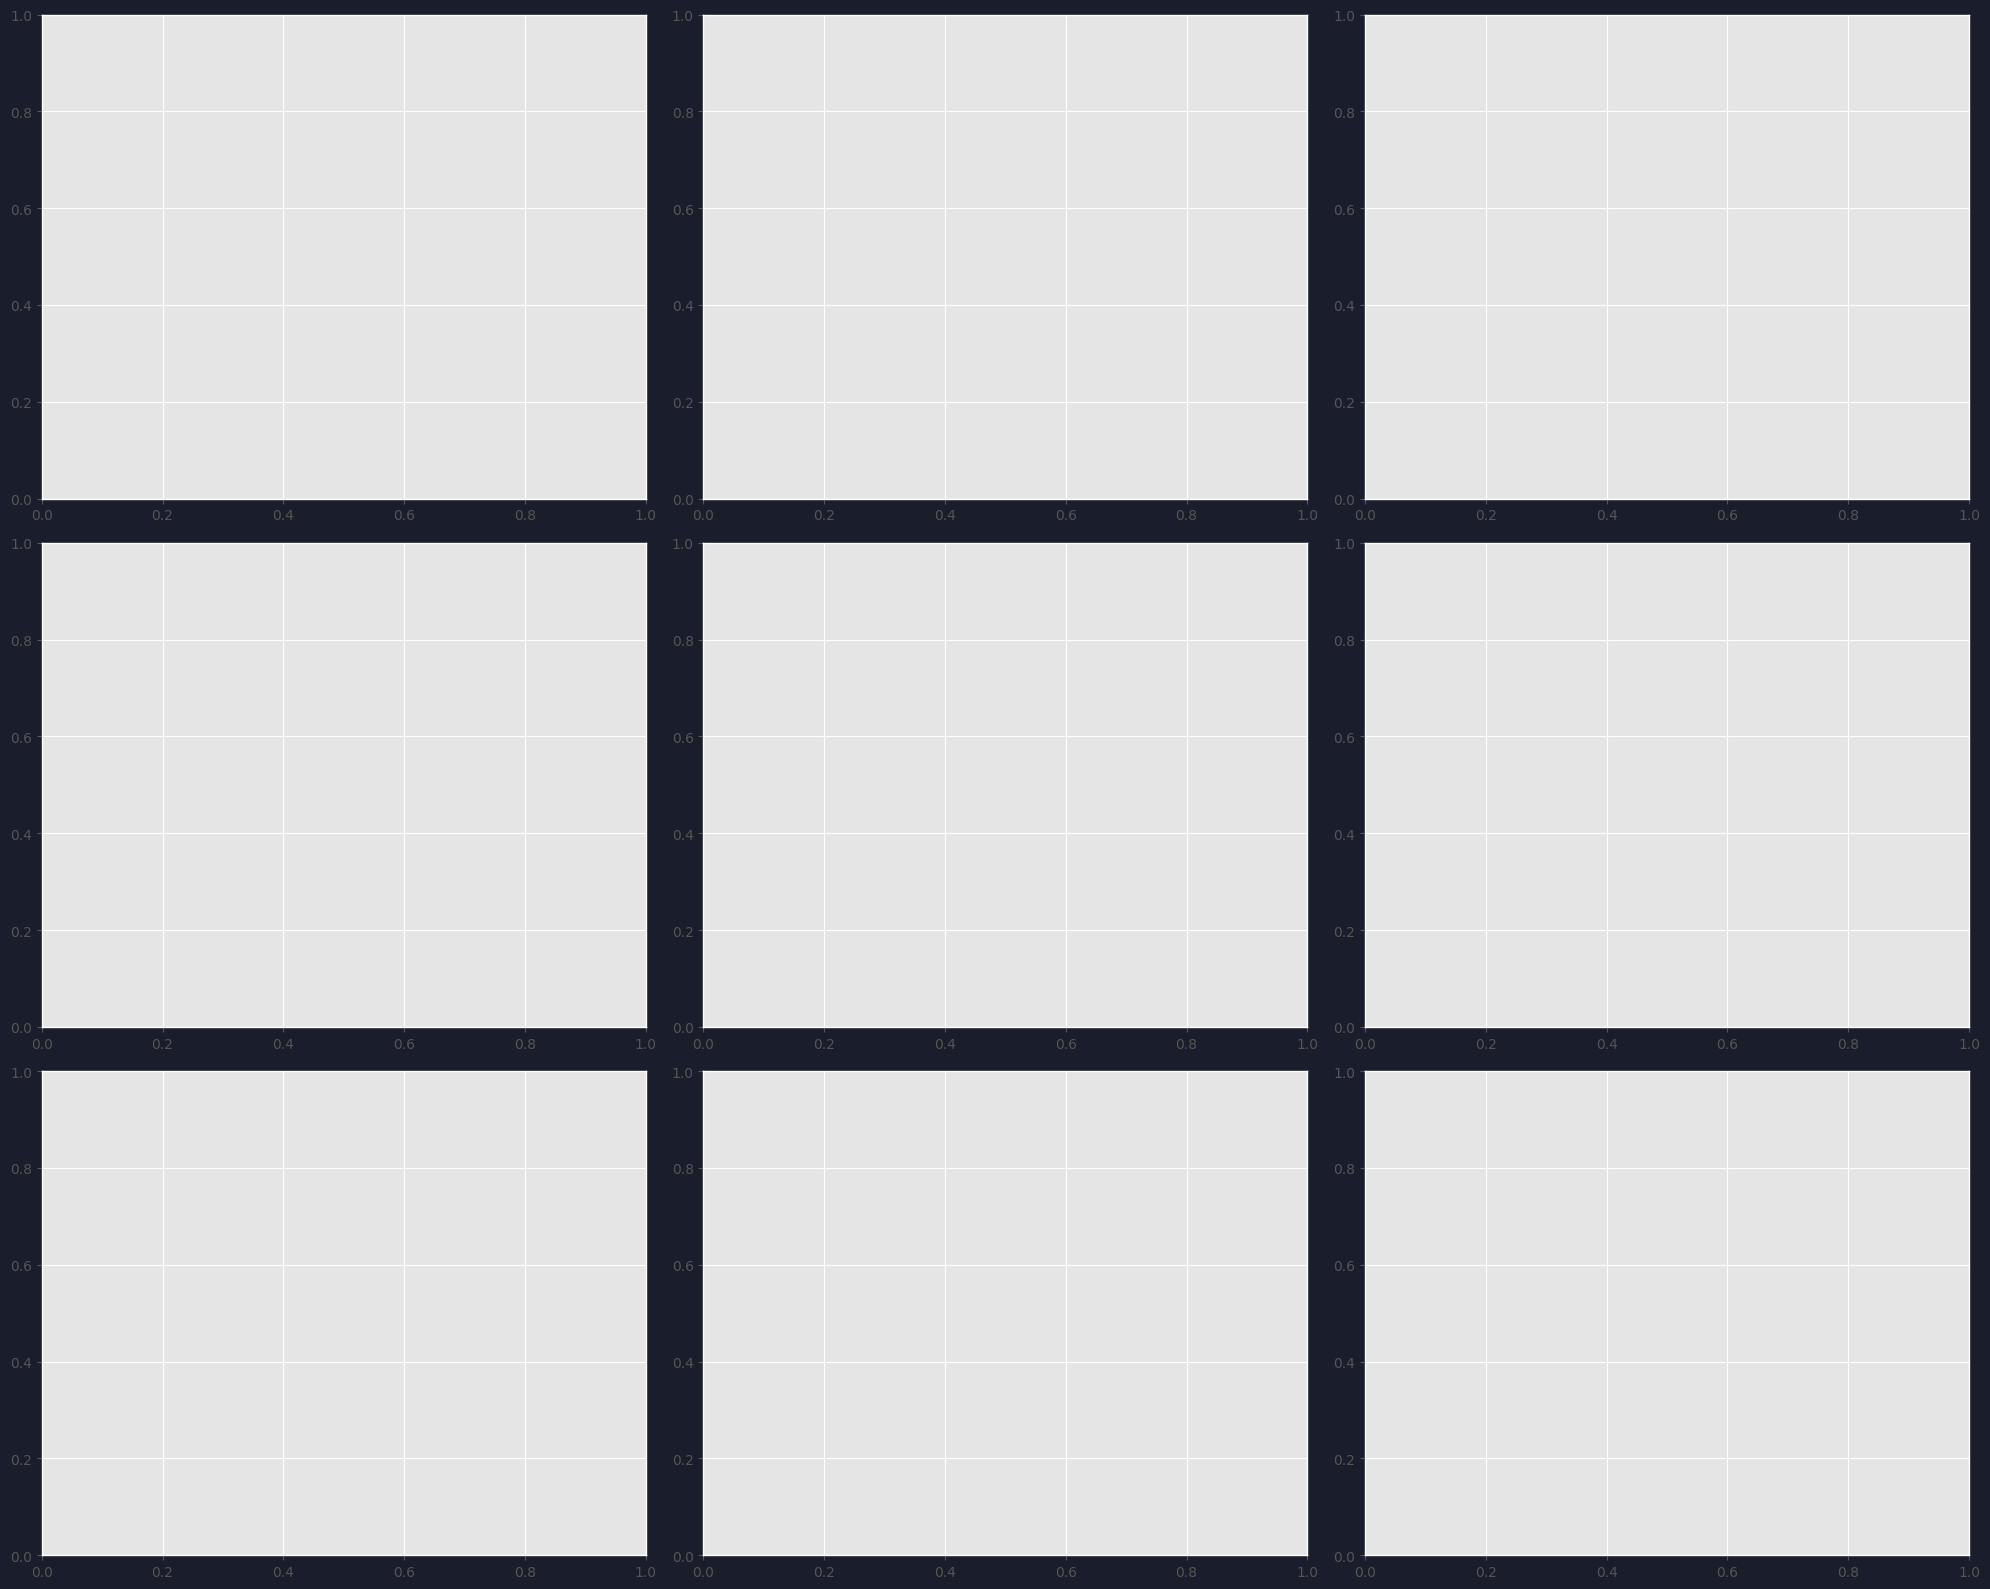

In [35]:
fig, ax = plt.subplots(nrows=3, ncols=3,figsize=(20,16))
plt.tight_layout()
fig.set_facecolor("#1A1D2C")


for a in range(0,3):
    for b in range(0,3):
        x=0.08
        y=0.8
        m=0
        cols=1
        count=0
        for i in range(0,5):
            for j in range(0,12):
                if count<passes[a][b]:
                    fcc="#CC4554"
                else:
                    fcc="grey"
                p1 = p.Circle((x, y), 0.04, fc=fcc,edgecolor='#1A1D2C')
                x=x+0.08
                ax[a][b].add_patch(p1)
                count=count+1
                cols=cols+1
                if (cols>12):
                        cols=1
                        x=0.08
                        y=y-0.08

        ax[a][b].axis('off')
        plt.subplots_adjust(wspace=0.6)
        
        ax[a][b].text(1.07,0.60,passes[a][b],color="white",fontsize=75,fontweight="bold")
        ax[a][b].text(1.07,0.50,"passes",color="#CC4554",fontsize=30,fontweight=600)
        ax[a][b].text(0.2,0.3,names[a][b],color="white",fontsize=30)
        
plt.text(-2.4,3.45,"PLAYERS WITH THE MOST PASSES - 15 seconds before a shot was taken",color="white",fontsize=25,fontweight=650)
plt.text(-1.3,3.3,"WORLD CUP 2018",color="white",fontsize=25,fontweight=650)
plt.text(-3.4,3.6,"^",color="#1A1D2C",fontsize=25,)

fig.text(1,-0.01,"Inspired by @petermckeever",fontsize=13,color="white")
fig.text(1,0.02,"Created by sai(@fcb_uchiha)",fontsize=13,color="white")


plt.savefig("dotmatrix.jpg",dpi=300,facecolor="#1A1D2C", bbox_inches = "tight")


In [421]:
p_df["pass.type.name"].value_counts()

Recovery        440
Free Kick       149
Throw-in        125
Interception     19
Goal Kick        17
Kick Off         12
Name: pass.type.name, dtype: int64

In [422]:
cor=pdf[pdf['pass.type.name']=='Free Kick'].index

In [423]:
pdf=pdf.drop(cor)

In [425]:
pdf["player.name"].value_counts().head(9)

Luka Modrić          48
Toni Kroos           43
Neymar Jr            42
Philippe Coutinho    42
Isco                 42
Kevin De Bruyne      42
Ivan Rakitić         38
Joshua Kimmich       38
Mesut Özil           37
Name: player.name, dtype: int64

In [431]:
p_df[p_df["player.name"]=="Kevin De Bruyne"].groupby("match_id").count()

,id,index,period,timestamp,minute,second,possession,duration,type.id,type.name,...,shot.one_on_one,block.save_block,pass.miscommunication,bad_behaviour.card.id,bad_behaviour.card.name,shot.open_goal,shot.deflected,shot.redirect,shot.follows_dribble,total_time
match_id,,,,,,,,,,,,,,,,,,,,,
7536,9,9,9,9,9,9,9,9,9,9,...,0,0,0,0,0,0,0,0,0,9
7552,13,13,13,13,13,13,13,13,13,13,...,0,0,0,0,0,0,0,0,0,13
7584,12,12,12,12,12,12,12,12,12,12,...,0,0,0,0,0,0,0,0,0,12
8650,6,6,6,6,6,6,6,6,6,6,...,0,0,0,0,0,0,0,0,0,6
8655,2,2,2,2,2,2,2,2,2,2,...,0,0,0,0,0,0,0,0,0,2
8657,3,3,3,3,3,3,3,3,3,3,...,0,0,0,0,0,0,0,0,0,3


In [439]:
sh_df[sh_df["possession_team.name"]=="Belgium"].head(10)

,type.name,location,minute,second,index,possession_team.name,match_id,timestamp,total_time
474,Shot,"[95.0, 33.0]",15,13,677,Belgium,7584,00:15:13.520,913
475,Shot,"[111.0, 51.0]",15,58,688,Belgium,7584,00:15:58.760,958
476,Shot,"[105.0, 40.0]",16,33,712,Belgium,7584,00:16:33.680,993
477,Shot,"[111.0, 48.0]",17,16,718,Belgium,7584,00:17:16.133,1036
478,Shot,"[112.0, 50.0]",17,17,723,Belgium,7584,00:17:17.440,1037
479,Shot,"[101.0, 50.0]",20,10,846,Belgium,7584,00:20:10.680,1210
480,Shot,"[114.0, 41.0]",24,53,1046,Belgium,7584,00:24:53.280,1493
481,Shot,"[102.0, 46.0]",26,5,1107,Belgium,7584,00:26:05.600,1565
482,Shot,"[102.0, 26.0]",26,32,1137,Belgium,7584,00:26:32.280,1592
483,Shot,"[118.0, 45.0]",27,26,1168,Belgium,7584,00:27:26.360,1646
